In [1]:
import sys
sys.path.append("..")

In [12]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot, simple_concat, concat_with_suffix, Aggregation
from wandb_downloader import RunsDownloader

In [3]:
wandb = RunsDownloader(project="suds")

In [4]:
mil = wandb.groups(
    "cmnist.SupportMatching.ranking-fdm.baseline_2021-09-22.subsampled",
    "cmnist.SupportMatching.no-cluster-fdm.baseline_2021-09-22.subsampled",
    "cmnist.SupportMatching.perfect-cluster.baseline_2021-09-22.subsampled",
)

'cmnist.SupportMatching.ranking-fdm.baseline_2021-09-22.subsampled': found 30 runs.
'cmnist.SupportMatching.no-cluster-fdm.baseline_2021-09-22.subsampled': found 30 runs.
'cmnist.SupportMatching.perfect-cluster.baseline_2021-09-22.subsampled': found 30 runs.


In [5]:
nomil = wandb.groups(
    "cmnist.SupportMatching.ranking-fdm.no_MIL_2021-09-22.subsampled",
    "cmnist.SupportMatching.no-cluster-fdm.no_MIL_2021-09-22.subsampled",
    "cmnist.SupportMatching.perfect-cluster.no_MIL_2021-09-22.subsampled",
)

'cmnist.SupportMatching.ranking-fdm.no_MIL_2021-09-22.subsampled': found 30 runs.
'cmnist.SupportMatching.no-cluster-fdm.no_MIL_2021-09-22.subsampled': found 30 runs.
'cmnist.SupportMatching.perfect-cluster.no_MIL_2021-09-22.subsampled': found 30 runs.


In [6]:
data = concat_with_suffix({
    # "": mil,
    "-nomil": nomil,
})

In [9]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 1.0),
    file_prefix="cmnist_2v4_subgroup_bias",
)

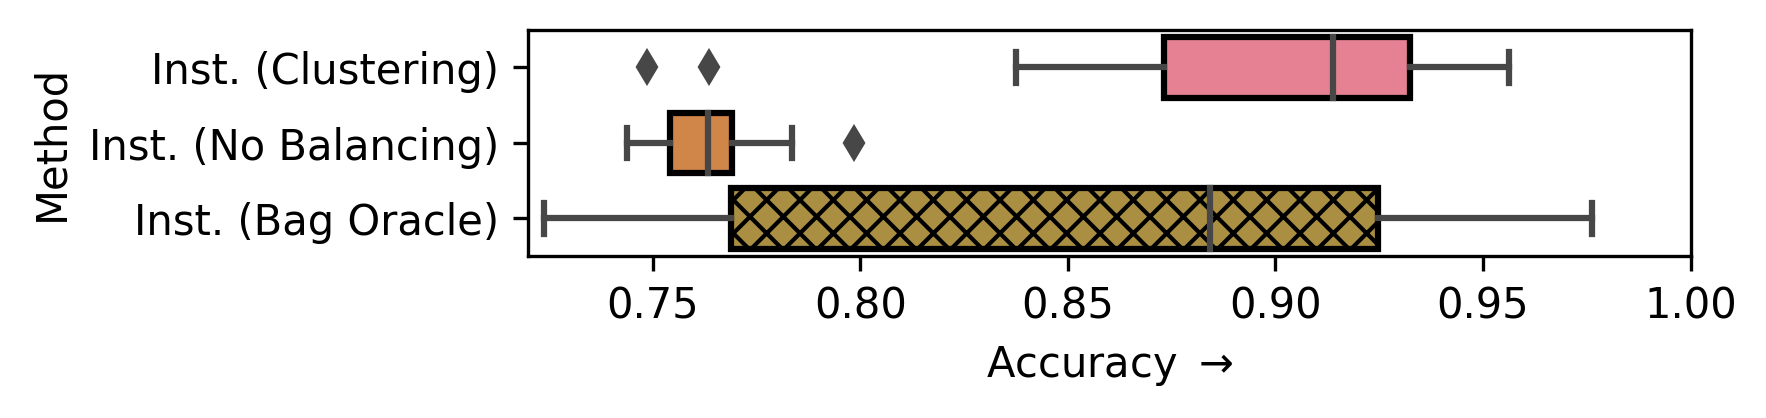

In [15]:
plot(data, metrics=[Metrics.acc], x_limits=(0.72, 1), **plot_kwargs)

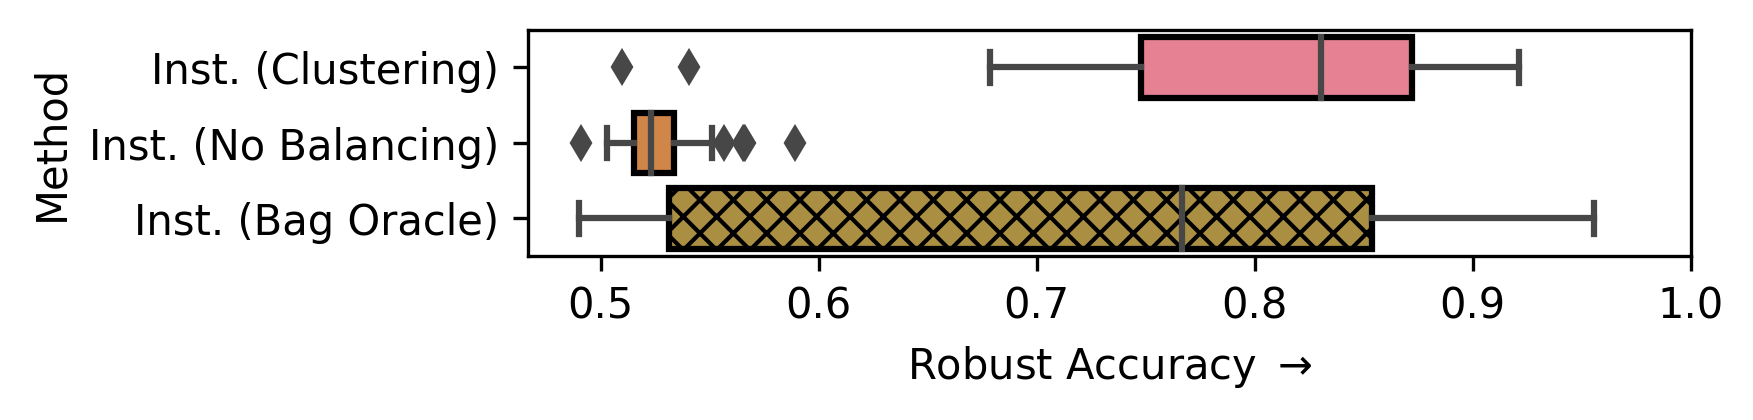

In [13]:
plot(
    data,
    metrics=[Metrics.acc],
    x_limits=(nan, 1),
    agg=Aggregation.min,
    x_label="Robust Accuracy $\\rightarrow$",
    **plot_kwargs,
)